#Churn Modelling for telecom customers

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
# Importing the dataset
dataset = pd.read_excel('mobile-churn-data.xlsx')


In [49]:
X = dataset.iloc[:,0:65]
y = dataset.iloc[:,65]

In [35]:
X.info()
y.head()
# print(len(x))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66469 entries, 0 to 66468
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   year                                        66469 non-null  int64  
 1   month                                       66469 non-null  int64  
 2   user_account_id                             66469 non-null  int64  
 3   user_lifetime                               66469 non-null  int64  
 4   user_intake                                 66469 non-null  int64  
 5   user_no_outgoing_activity_in_days           66469 non-null  int64  
 6   user_account_balance_last                   66469 non-null  float64
 7   user_spendings                              66469 non-null  float64
 8   user_has_outgoing_calls                     66469 non-null  int64  
 9   user_has_outgoing_sms                       66469 non-null  int64  
 10  user_use_g

0    0
1    0
2    0
3    1
4    0
Name: churn, dtype: int64

In [50]:
X.drop(["year", "month", "user_account_id", "user_intake", "gprs_session_count", ], axis = 1, inplace = True)
# x.info()

In [67]:
x.info()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66469 entries, 0 to 66468
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   user_lifetime                               66469 non-null  int64  
 1   user_no_outgoing_activity_in_days           66469 non-null  int64  
 2   user_account_balance_last                   66469 non-null  float64
 3   user_spendings                              66469 non-null  float64
 4   user_has_outgoing_calls                     66469 non-null  int64  
 5   user_has_outgoing_sms                       66469 non-null  int64  
 6   user_use_gprs                               66469 non-null  int64  
 7   user_does_reload                            66469 non-null  int64  
 8   reloads_inactive_days                       66469 non-null  int64  
 9   reloads_count                               66469 non-null  int64  
 10  reloads_su

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [70]:
# Initialising the ANN
classifier = Sequential()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53175 entries, 34981 to 43567
Data columns (total 60 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   user_lifetime                               53175 non-null  int64  
 1   user_no_outgoing_activity_in_days           53175 non-null  int64  
 2   user_account_balance_last                   53175 non-null  float64
 3   user_spendings                              53175 non-null  float64
 4   user_has_outgoing_calls                     53175 non-null  int64  
 5   user_has_outgoing_sms                       53175 non-null  int64  
 6   user_use_gprs                               53175 non-null  int64  
 7   user_does_reload                            53175 non-null  int64  
 8   reloads_inactive_days                       53175 non-null  int64  
 9   reloads_count                               53175 non-null  int64  
 10  reload

In [71]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 60))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding third hidden layer
# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
model_history.history

{'loss': [48.70603942871094,
  0.9852884411811829,
  0.8084566593170166,
  0.6929793357849121,
  0.5579239726066589,
  0.4593740999698639,
  0.42166808247566223,
  0.3991380035877228,
  0.3889683783054352,
  0.37715673446655273,
  0.3699803948402405,
  0.36622971296310425,
  0.36204734444618225,
  0.36133357882499695,
  0.3547612130641937,
  0.3534696698188782,
  0.3499034643173218,
  0.34694135189056396,
  0.3454258441925049,
  0.3438076376914978,
  0.3423507809638977,
  0.3409031927585602,
  0.34090450406074524,
  0.34092283248901367,
  0.3394428789615631,
  0.3392799198627472,
  0.3376304507255554,
  0.33904173970222473,
  0.33640554547309875,
  0.336919367313385,
  0.33664119243621826,
  0.33617764711380005,
  0.3342372477054596,
  0.33489611744880676,
  0.3345668911933899,
  0.3330267667770386,
  0.33374688029289246,
  0.33284738659858704,
  0.33318817615509033,
  0.3318156898021698,
  0.3314529061317444,
  0.3305993378162384,
  0.33170145750045776,
  0.3307683765888214,
  0.33041

In [72]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
3563/3563 [==============================] - 4s 1ms/step - loss: 48.7060 - accuracy: 0.7800 - val_loss: 1.2693 - val_accuracy: 0.8282
Epoch 2/100
3563/3563 [==============================] - 4s 1ms/step - loss: 0.9853 - accuracy: 0.8317 - val_loss: 0.8292 - val_accuracy: 0.8531
Epoch 3/100
3563/3563 [==============================] - 4s 1ms/step - loss: 0.8085 - accuracy: 0.8444 - val_loss: 0.9434 - val_accuracy: 0.8550
Epoch 4/100
3563/3563 [==============================] - 4s 1ms/step - loss: 0.6930 - accuracy: 0.8426 - val_loss: 0.4729 - val_accuracy: 0.8564
Epoch 5/100
3563/3563 [==============================] - 4s 1ms/step - loss: 0.5579 - accuracy: 0.8442 - val_loss: 0.4458 - val_accuracy: 0.8597
Epoch 6/100
3563/3563 [==============================] - 4s 1ms/step - loss: 0.4594 - accuracy: 0.8521 - val_loss: 0.3922 - val_accuracy: 0.8572
Epoch 7/100
3563/3563 [==============================] - 4s 1ms/step - loss: 0.4217 - accuracy: 0.8557 - val_loss: 0.4074 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


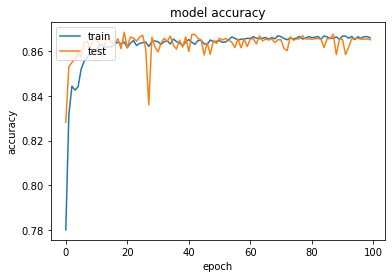

In [75]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
# summarize history for loss
plt.plot(model_history.history['val_loss'])
plt.plot(model_history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


KeyError: 'al_loss'

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [81]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[9883,  569],
       [1226, 1616]], dtype=int64)

In [80]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score


0.8649766812095683